In [421]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import theano
import theano.tensor as tt
from theano.tensor import fft

muJ=np.asarray([-0.03425363, -0.03351397, -0.02664699, -0.02273714, -0.03174768,
       -0.03957353, -0.04738784, -0.05586893, -0.06363427, -0.07391645,
       -0.08178534, -0.08926872, -0.09593623, -0.09036217, -0.07807825,
       -0.06753805, -0.05767188, -0.06243789, -0.06809364, -0.06405182,
       -0.06114183, -0.04508844, -0.03290343, -0.02404407, -0.02079736,
       -0.03644591, -0.03598996, -0.03445805, -0.03331908, -0.01566788,
       -0.01656279, -0.01754197, -0.0130746 ,  0.00193958,  0.01056539,
        0.01698442,  0.0382919 ,  0.05958532,  0.06605687,  0.07316159,
        0.07929714,  0.08111757,  0.08236758,  0.08409051,  0.07132862,
        0.06410184,  0.06383741,  0.0638774 ,  0.06268115,  0.0642296 ,
        0.07699274,  0.09465466,  0.10719381,  0.07496593,  0.04823132,
        0.02464346,  0.00900288, -0.00262479, -0.01581547, -0.02713472,
       -0.04211868, -0.06695968, -0.0843794 , -0.0838455 , -0.09070336,
       -0.09610623, -0.09881969, -0.09027169, -0.08033855, -0.06809048,
       -0.04661056, -0.01563495,  0.0156263 ,  0.03325961,  0.04721029,
        0.0665903 ,  0.09242785,  0.10892494,  0.12218285,  0.1282392 ,
        0.13511139,  0.14373963,  0.15130526,  0.15932193,  0.1431794 ,
        0.08651746,  0.06932233,  0.05781805,  0.05321184,  0.04833902,
        0.04359331,  0.03972242,  0.03617235,  0.0324834 ,  0.04958008,
        0.05654622,  0.05459009,  0.07174552,  0.09021518,  0.10966458])
XK_new=np.linspace(57690.160596,58541.349392,100,dtype=np.float64)

muK = np.asarray([-0.0188423 , -0.01101513, -0.02182555, -0.04066994, -0.0372273 ,
       -0.04142979, -0.04643643, -0.05618733, -0.06305947, -0.07055236,
       -0.07793845, -0.08585502, -0.06063842, -0.04144011, -0.04482767,
       -0.05074738, -0.05828078, -0.06202257, -0.0469031 , -0.03229114,
       -0.01682147, -0.00109132,  0.01100408,  0.02217135,  0.00313528,
       -0.01391616, -0.02103778, -0.00784842, -0.00958049, -0.00958786,
        0.01109297, -0.00763489, -0.02091672, -0.01876265,  0.00469278,
        0.0188317 ,  0.03078942,  0.04751188,  0.06810743,  0.07498746,
        0.08292102,  0.08732753,  0.10046523,  0.11947633,  0.13786948,
        0.14400703,  0.13987333,  0.13111406,  0.12287179,  0.11626273,
        0.11051379,  0.09606653,  0.03146849, -0.03145527, -0.03731231,
        0.05864158,  0.10667121,  0.12383762,  0.11461967,  0.08906796,
        0.06559065,  0.04109558,  0.02030753, -0.00256419, -0.02360279,
       -0.04425853, -0.07565115, -0.11281323, -0.158842  , -0.15194773,
       -0.13758974, -0.12698046, -0.11453399, -0.09043922, -0.06368814,
       -0.03801246, -0.01361853,  0.01826796,  0.04772783,  0.0783482 ,
        0.10210635,  0.11343715,  0.11997221,  0.12888862,  0.14047052,
        0.1510065 ,  0.16296829,  0.15034888,  0.12048199,  0.10888384,
        0.10030352,  0.09039116,  0.08457157,  0.07565612,  0.06965578,
        0.06232899,  0.05684617,  0.07264807,  0.09185271,  0.10704618])

sdK= np.asarray([0.01988143, 0.02823802, 0.02842399, 0.02519744, 0.02685983,
       0.03892542, 0.05028333, 0.05689614, 0.05813455, 0.05403651,
       0.04471803, 0.02418143, 0.03161986, 0.02934869, 0.04177712,
       0.04655686, 0.03921996, 0.02387052, 0.02670243, 0.0358775 ,
       0.0404354 , 0.02561409, 0.03271019, 0.02208746, 0.03147129,
       0.02778667, 0.01997748, 0.02645743, 0.02909296, 0.02507729,
       0.02358237, 0.03032299, 0.02790866, 0.01985626, 0.02860159,
       0.02765181, 0.02107263, 0.03497932, 0.0255268 , 0.03756821,
       0.04205965, 0.03471579, 0.03107883, 0.03834469, 0.03036075,
       0.02955552, 0.0268117 , 0.04630602, 0.05364562, 0.0514371 ,
       0.04249924, 0.0266177 , 0.03959254, 0.04223779, 0.03861979,
       0.02962969, 0.03502534, 0.03253784, 0.03910857, 0.04728147,
       0.0472931 , 0.03952985, 0.0238944 , 0.03969748, 0.04179032,
       0.02498722, 0.03114984, 0.02718431, 0.02714058, 0.03081888,
       0.02916275, 0.0340881 , 0.02559767, 0.02691825, 0.03102352,
       0.02701771, 0.01996262, 0.02890135, 0.02935551, 0.02249271,
       0.02631584, 0.03960783, 0.05016029, 0.05681583, 0.05473107,
       0.04716982, 0.03231861, 0.02949984, 0.02315253, 0.0270892 ,
       0.03911139, 0.05046017, 0.05845151, 0.05975193, 0.05511116,
       0.04632993, 0.02836088, 0.02897927, 0.02732322, 0.02084374])

In [2]:
import numpy as np
import theano
import theano.tensor as tt
from theano.tensor import fft

x = tt.matrix('x')

rfft = fft.rfft(x, norm='ortho')
f_rfft = theano.function([x], rfft)

N = 1024
box = np.zeros((1, N))
box[:, N//2-10: N//2+10] = 1

out = f_rfft(box)
c_out = np.asarray(out[0, :, 0] + 1j*out[0, :, 1])
abs_out = abs(c_out)

In [422]:
import theano
import theano.tensor as tt
from theano.tensor.nnet import conv
import lasagne

conv2d = theano.tensor.nnet.conv2d

#x = tt.matrix()
#y = tt.matrix()

#veclen = x.shape[1]
#print(veclen)

#conv1d_expr = conv2d(x, y, input_shape=(1, veclen), border_mode='full')

#conv1d = theano.function([x, y], outputs=conv1d_expr)
muJ.shape

(100,)

In [423]:
import theano
import theano.tensor as tt
from theano.tensor.nnet import conv
import lasagne

with pm.Model() as convmodel:
    
    # Define priors
    sigma_DT=pm.Uniform('sigma_DT', lower=-7.0, upper=2.0)
    sigma_AD=pm.Uniform('sigma_AD', lower=-7.0, upper=2.0)
    mu_DT=pm.Uniform('mu_DT', lower=2.7, upper=4.0)
    mu_AD=pm.Uniform('mu_AD', lower=0.0, upper=2.3)
    A_T=pm.Uniform('A_T', lower=0.0, upper=1.0)
    T=pm.Uniform('T', lower=1300.0, upper=1700.0)
    wav=pm.Uniform('wav', lower=0.0, upper=10000.0)
    wav_0=pm.Uniform('wav_0', lower=0.0, upper=10000.0)
    index=pm.Uniform('index', lower=0.0, upper=10.0)
   
    h = 6.626e-34#Plancks constant
    c = 299792458#speed of light
    k = 1.38e-23#Boltzmanns constant
    
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    BB = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    exp_DT = -((tt.log(XK_new)-mu_DT)**2/(2*sigma_DT**2))
    front_DT = A_T/(XK_new*sigma_DT*np.sqrt(2*np.pi))
    Psi_DT = BB*front_DT*np.exp(exp_DT)
    powr = (wav/wav_0)**(index)
    exp_AD = -((tt.log(XK_new)-mu_AD)**2/(2*sigma_AD**2))
    front_AD = (1.0-A_T)/(XK_new*sigma_AD*np.sqrt(2*np.pi))
    Psi_AD = powr*front_AD*tt.exp(exp_AD)
    transfer = Psi_DT + Psi_AD
    
    #ffttransfer= theano.tensor.fft.rfft(transfer,norm='ortho')#np.fft.fft(transfer)#theano.tensor.fft.rfft(transfer,norm='ortho')#np.fft.fft(transfer)#theano.tensor.fft.rfft(transfer)##f_rfft(transfer)#
    #fftmu= np.fft.fft(mu)#theano.tensor.fft.rfft(Fc)#np.fft.fft(mu)
    #con=ffttransfer*fftmu
    #conv= theano.tensor.fft.irfft(con)#f_irftt(con)#np.fft.ifft(ffttransfer*fftmu)
    
    conv2d = theano.tensor.nnet.conv2d

    conv1d_expr = conv2d([transfer,muJ,1,1], input_shape=(len(muJ),len(muJ),1,1),filter_shape=None ,border_mode='full')
    
    #conv= np.convolve(transfer,muJ,'same')
    #conv = np.fft.ifft(np.fft.fft(transfer) * np.fft.fft(muJ)).real
    
    likelihood = pm.Normal('muK', mu=conv1d_expr, sigma=sdK, observed=muK)

    tracetransfer = pm.sample(2000)

TypeError: conv2d() missing 1 required positional argument: 'filters'

# All of this stuff below is just for looking at the transfer function and using MCMC hammer instead

In [4]:
#Define simple planck function
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return 1e45*intensity

In [5]:
def transferDT(x,mu,sigma,A_T,wav,T):
    '''Defines the transfer function for the DT'''
    BB = planck(wav, T)
    exp = -((np.log(x)-mu)**2/(2*sigma**2))
    front = A_T/(x*sigma*np.sqrt(2*np.pi))
    return BB*front*np.exp(exp)

In [6]:
#might need to include a normalization here
#can you determine the index of the power law? Maybe by a fit in a filter?
def power(wav,wav_0,index):
    powr=(wav/wav_0)**(index)
    return powr

In [7]:
def transferAD(x,mu,sigma,A_T,wav,wav_0,index):
    '''Defines the transfer function for the AD'''
    powr = power(wav, wav_0, index)
    exp = -((np.log(x)-mu)**2/(2*sigma**2))
    front = (1.0-A_T)/(x*sigma*np.sqrt(2*np.pi))
    return powr*front*np.exp(exp)

In [8]:
def transfertot(x,mu_DT,mu_AD,sigma_DT,sigma_AD,A_T,T,wav,wav_0,index):
    transfer_DT = transferDT(x,mu_DT,sigma_DT,A_T,wav,T)
    transfer_AD = transferAD(x,mu_AD,sigma_AD,A_T,wav,wav_0,index)
    return transfer_DT + transfer_AD

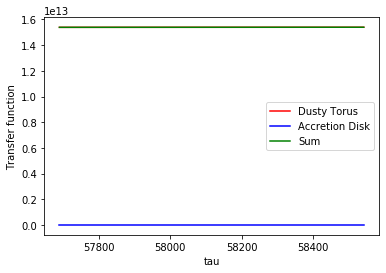

In [9]:
#define some data and parameters and plot the transfer functions 
#tau=np.linspace(0.01,4,100)
sigma_DT=1
sigma_AD=1
mu_DT=12
mu_AD=1
A_T=0.4
T=1700
wav=6200
wav_0=6200
index=1.0

resDT= transferDT(XK_new,mu_DT,sigma_DT,A_T,wav,T)
resAD= transferAD(XK_new,mu_AD,sigma_AD,A_T,wav,wav_0,index)
ressum= resDT+resAD#transfertot(X_new,mu_DT,mu_AD,sigma_DT,sigma_AD,A_T,T,wav,wav_0,index)
#ffttransfer= theano.tensor.fft.irfft(resDT*resAD)
plt.plot(XK_new,resDT,'r',label="Dusty Torus")
plt.plot(XK_new,resAD,'b',label="Accretion Disk")
plt.plot(XK_new,ressum,'g',label="Sum")
plt.xlabel("tau")
plt.ylabel("Transfer function")
plt.legend()
plt.show()

In [10]:
def convolution(X,mu_DT,mu_AD,sigma_DT,sigma_AD,A_T,T,wav,wav_0,index):
    x,muJ=X
    convol=np.convolve(transfertot(x,mu_DT,mu_AD,sigma_DT,sigma_AD,A_T,T,wav,wav_0,index),muJ,'same')
    return convol

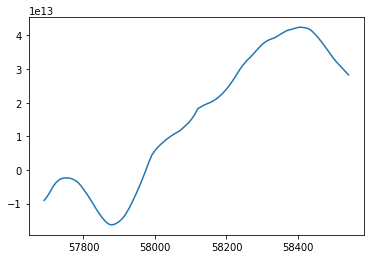

In [12]:
Xhere=[XK_new,muJ]
convol=convolution(Xhere,mu_DT,mu_AD,sigma_DT,sigma_AD,A_T,T,wav,wav_0,index)

plt.plot(XK_new,convol)
#plt.plot(XK_new,conv*1e26)
#plt.plot(XK_new,conv-convol)
#plt.plot(XK_new,muK)


In [58]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


p0= 12., 1., 1., 1., 0.4, 1700., 6200., 6200., 1.0
popt, pcov = curve_fit(convolution, [XK_new,muJ], muK, p0)

In [59]:
popt

array([1.2e+01, 1.0e+00, 1.0e+00, 1.0e+00, 4.0e-01, 1.7e+03, 6.2e+03,
       6.2e+03, 1.0e+00])

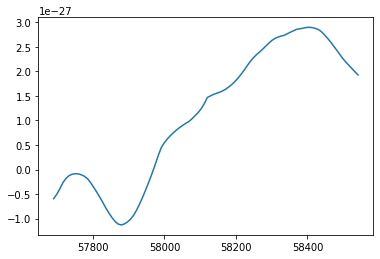

In [68]:
#plt.plot(XK_new,muK)
plt.plot(XK_new,convolution(Xhere,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],popt[6],popt[7],popt[8]))

In [69]:
from lmfit import Model
mod = Model(convolution)

In [79]:
params = mod.make_params(mu_DT=3.,mu_AD=1.,sigma_DT=1.,sigma_AD=1.,A_T=0.1,T=1300.,wav=6200.,wav_0=6200.,index=1.0)

params['sigma_DT'].min = -7.0
params['sigma_DT'].max = 2.0
params['sigma_AD'].min = -7.0
params['sigma_AD'].max = 2.0
params['mu_DT'].min = 2.7
params['mu_DT'].max = 4.0
params['mu_AD'].min = 0.0
params['mu_AD'].max = 2.3
params['A_T'].min = 0.0
params['A_T'].max = 1.0
params['T'].min = 1300.0
params['T'].max = 1700.0
params['wav'].min = 0.0
params['wav'].max = 10000.0
params['wav_0'].min = 0.0
params['wav_0'].max = 10000.0
params['index'].min = 0.0
params['index'].max = 10.0

result = mod.fit(muK, params, X=Xhere)

In [80]:
print(result.fit_report())

[[Model]]
    Model(convolution)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 100
    # variables        = 9
    chi-square         = 0.67761632
    reduced chi-square = 0.00744633
    Akaike info crit   = -481.434424
    Bayesian info crit = -457.987892
##  Warning: uncertainties could not be estimated:
    mu_DT:     at initial value
    mu_AD:     at initial value
    sigma_DT:  at initial value
    sigma_AD:  at initial value
    A_T:       at initial value
    T:         at initial value
    T:         at boundary
    wav:       at initial value
    wav_0:     at initial value
    index:     at initial value
[[Variables]]
    mu_DT:     3.00000000 (init = 3)
    mu_AD:     1.00000000 (init = 1)
    sigma_DT:  1.00000000 (init = 1)
    sigma_AD:  1.00000000 (init = 1)
    A_T:       0.10000000 (init = 0.1)
    T:         1300.00000 (init = 1300)
    wav:       6200.00000 (init = 6200)
    wav_0:     6200.00000 (init = 6200

In [434]:
def log_likelihood(theta, x, y, Fc, yerr):
    sigma_DT, sigma_AD, mu_DT, mu_AD, A_T, T, wav, wav_0, K_0, index, log_f = theta
    h = 6.626e-34#Plancks constant
    c = 299792458#speed of light
    k = 1.38e-23#Boltzmanns constant
    wav=1e-9*wav
    x=86400.0*x
    
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    BB = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    exp_DT = -((np.log(x)-mu_DT)**2/(2*sigma_DT**2))
    front_DT = A_T/(x*sigma_DT*np.sqrt(2*np.pi))
    norm_DT = h**5*c**3/(k**6*T**6)#normalization to get Psi_DT unitless
    Psi_DT = norm_DT*BB*front_DT*np.exp(exp_DT)
    
    powr = K_0*(wav/wav_0)**(index)
    exp_AD = -((np.log(x)-mu_AD)**2/(2*sigma_AD**2))
    front_AD = (1.0-A_T)/(x*sigma_AD*np.sqrt(2*np.pi))
    Psi_AD = powr*front_AD*np.exp(exp_AD)
    
    transfer = Psi_DT + Psi_AD
    
    model = np.convolve(transfer, Fc,'same')
    sigma2 = yerr**2 + model**2*np.exp(2*log_f)
    return -0.5*np.sum((y-model)**2/sigma2 + np.log(sigma2))

In [488]:
from scipy.optimize import minimize

sigma_DT_val=1.0#0.04
sigma_AD_val=1.0#0.04
mu_DT_val=5.5#5.5
mu_AD_val=2.2#2.4
A_T_val=0.5
T_val=1800.0
wav_val=2500.0#10.0
wav_0_val=2500.0#100.0
K_0_val=1.0
index_val=-2.0
log_f_val=0.51
param=11

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([sigma_DT_val, sigma_AD_val, mu_DT_val, mu_AD_val, A_T_val, T_val, wav_val, wav_0_val, K_0_val, index_val, log_f_val]) + 0.01*np.random.randn(param)
soln = minimize(nll, initial, args=(XK_new, muK, muJ, sdK))
sigma_DT_ml, sigma_AD_ml, mu_DT_ml, mu_AD_ml, A_T_ml, T_ml, wav_ml, wav_0_ml, K_0_ml, index_ml, log_f_ml = soln.x

print("Maximum likelihood estimates:")
print(soln.x)
  

Maximum likelihood estimates:
[ 1.00496714e+00  9.98617357e-01  5.50647689e+00  2.21523030e+00
  4.97658466e-01  1.79999766e+03  2.50001579e+03  2.50000767e+03
  9.95305256e-01 -1.99457440e+00  5.05365823e-01]


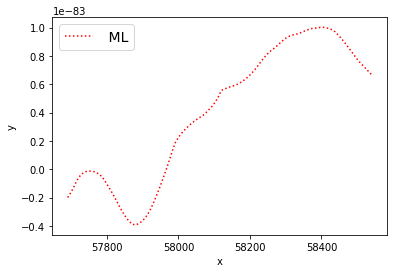

In [489]:
#Define simple planck function
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(1e-9*wav*k*T)
    intensity = a/ ( ((1e-9*wav)**5) * (np.exp(b) - 1.0) )
    return intensity
def transferDT(x,mu,sigma,A_T,wav,T):
    '''Defines the transfer function for the DT'''
    x = 86400.0*x
    BB = planck(wav, T)
    exp = -((np.log(x)-mu)**2/(2*sigma**2))
    front = A_T/(x*sigma*np.sqrt(2*np.pi))
    norm_DT = h**5*c**3/(k**6*T**6)#normalization to get Psi_DT unitless
    return norm_DT*BB*front*np.exp(exp)
#might need to include a normalization here
#can you determine the index of the power law? Maybe by a fit in a filter?
def power(wav,wav_0,K_0,index):
    powr=K_0*(wav/wav_0)**(index)
    return powr
def transferAD(x,mu,sigma,A_T,wav,wav_0,K_0,index):
    '''Defines the transfer function for the AD'''
    x = 86400.0*x
    powr = power(wav, wav_0, K_0, index)
    exp = -((np.log(x)-mu)**2/(2*sigma**2))
    front = (1.0-A_T)/(x*sigma*np.sqrt(2*np.pi))
    return powr*front*np.exp(exp)
def transfertot(x,mu_DT,mu_AD,sigma_DT,sigma_AD,A_T,T,wav,wav_0, K_0,index):
    transfer_DT = transferDT(x,mu_DT,sigma_DT,A_T,wav,T)
    transfer_AD = transferAD(x,mu_AD,sigma_AD,A_T,wav,wav_0,K_0,index)
    return transfer_DT + transfer_AD

conv=np.convolve( transfertot(XK_new,mu_DT_ml,mu_AD_ml,sigma_DT_ml,sigma_AD_ml,A_T_ml,T_ml,wav_ml,wav_0_ml,K_0_ml,index_ml), muJ, 'same')
#plt.errorbar(XK_new, muK, yerr=sdK, fmt=".k", capsize=0)
plt.plot(XK_new, conv, ":r", label=" ML")
#plt.plot(XK_new, muJ, '*', label="muJ")
plt.legend(fontsize=14)
plt.xlabel("x")
plt.ylabel("y");

In [497]:
#define the prior 

def log_prior(theta):
    sigma_DT, sigma_AD, mu_DT, mu_AD, A_T, T, wav, wav_0, K_0, index, log_f = theta
    if (0.0 < sigma_DT < 3.5 and 0.0 < sigma_AD < 3.5 and 0.0 < mu_DT < 7.0
        and 0 < mu_AD < 7.0 and 0.0 < A_T < 1.0 and 1300.0 < T < 2000.0 and 0.0 < wav < 6000.0
        and 0.0 < wav_0 < 6000.0 and 0.0 < K_0 < 10.0 and -3.0 < index < 0.0 and 0.0 < log_f < 1.0):
        return 0.0
    return -np.inf

In [498]:
def log_probability(theta, x, y, Fc, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, Fc, yerr)

In [510]:
import emcee
#sigma_DT_val, sigma_AD_val, mu_DT_val, mu_AD_val, A_T_val, T_val, wav_val, wav_0_val, K_0_val, index_val, log_f_val = soln.x
pos = soln.x + 1e-1 * np.random.randn(200, 11)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(XK_new, muK, muJ, sdK))
sampler.run_mcmc(pos, 10000, progress=True);

100%|██████████| 10000/10000 [10:35<00:00, 17.29it/s]


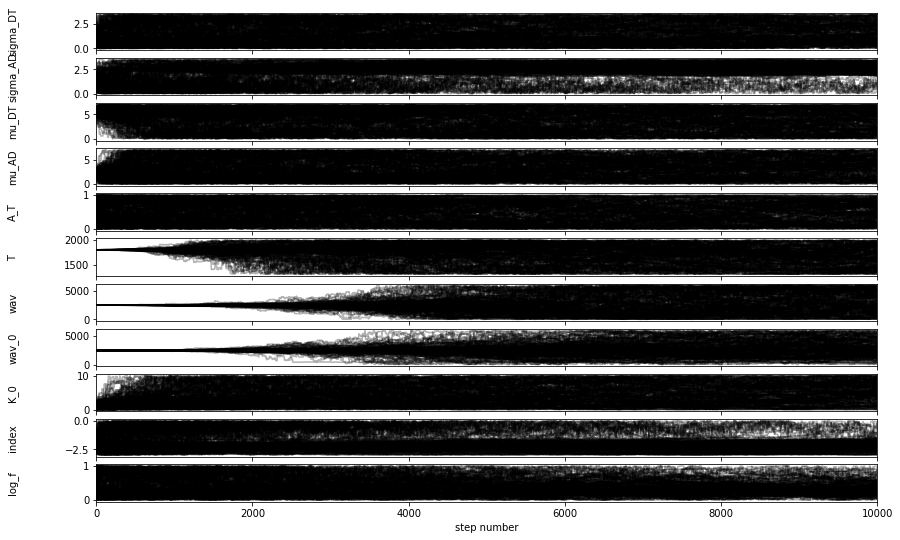

In [511]:
fig, axes = plt.subplots(11, figsize=(14, 9), sharex=True)
samples = sampler.get_chain()
labels = ["sigma_DT", "sigma_AD", "mu_DT", "mu_AD", "A_T", "T", "wav", "wav_0", "K_0", "index", "log_f"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [512]:
tau = sampler.get_autocorr_time()
print(tau)

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 11 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 200;
tau: [ 844.32730094  940.78008543  864.02817866  847.16753488  854.11535154
  912.18056615  964.29988524 1000.1542216   916.05780312  945.23190794
  806.98081326]

In [513]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(132000, 11)


In [503]:
planck(wav_ml,T_ml)

51845538628.43795

In [504]:
transferDT(XK_new,mu_DT_ml,sigma_DT_ml,A_T_ml,wav_ml,T_ml)

array([4.25749055e-84, 4.24630228e-84, 4.23514497e-84, 4.22401854e-84,
       4.21292290e-84, 4.20185797e-84, 4.19082364e-84, 4.17981983e-84,
       4.16884646e-84, 4.15790343e-84, 4.14699066e-84, 4.13610805e-84,
       4.12525553e-84, 4.11443300e-84, 4.10364037e-84, 4.09287757e-84,
       4.08214449e-84, 4.07144107e-84, 4.06076720e-84, 4.05012281e-84,
       4.03950781e-84, 4.02892211e-84, 4.01836563e-84, 4.00783829e-84,
       3.99733999e-84, 3.98687066e-84, 3.97643021e-84, 3.96601856e-84,
       3.95563563e-84, 3.94528132e-84, 3.93495556e-84, 3.92465827e-84,
       3.91438936e-84, 3.90414875e-84, 3.89393636e-84, 3.88375211e-84,
       3.87359592e-84, 3.86346769e-84, 3.85336736e-84, 3.84329485e-84,
       3.83325006e-84, 3.82323293e-84, 3.81324337e-84, 3.80328131e-84,
       3.79334665e-84, 3.78343933e-84, 3.77355926e-84, 3.76370637e-84,
       3.75388058e-84, 3.74408180e-84, 3.73430997e-84, 3.72456500e-84,
       3.71484681e-84, 3.70515534e-84, 3.69549049e-84, 3.68585220e-84,
      

In [505]:
power(wav_ml,wav_0_ml,K_0_ml,index_ml)

0.9952988099906334

In [506]:
transferAD(XK_new,mu_AD_ml,sigma_AD_ml,A_T_ml,wav_ml,wav_0_ml,K_0_ml,index_ml)

array([3.19441890e-99, 3.18435682e-99, 3.17432785e-99, 3.16433189e-99,
       3.15436882e-99, 3.14443852e-99, 3.13454088e-99, 3.12467580e-99,
       3.11484316e-99, 3.10504284e-99, 3.09527475e-99, 3.08553876e-99,
       3.07583477e-99, 3.06616266e-99, 3.05652234e-99, 3.04691368e-99,
       3.03733658e-99, 3.02779094e-99, 3.01827665e-99, 3.00879359e-99,
       2.99934166e-99, 2.98992075e-99, 2.98053077e-99, 2.97117159e-99,
       2.96184312e-99, 2.95254526e-99, 2.94327789e-99, 2.93404091e-99,
       2.92483423e-99, 2.91565772e-99, 2.90651130e-99, 2.89739486e-99,
       2.88830829e-99, 2.87925150e-99, 2.87022438e-99, 2.86122684e-99,
       2.85225876e-99, 2.84332005e-99, 2.83441061e-99, 2.82553034e-99,
       2.81667914e-99, 2.80785691e-99, 2.79906356e-99, 2.79029897e-99,
       2.78156306e-99, 2.77285573e-99, 2.76417687e-99, 2.75552640e-99,
       2.74690422e-99, 2.73831022e-99, 2.72974431e-99, 2.72120641e-99,
       2.71269640e-99, 2.70421420e-99, 2.69575971e-99, 2.68733284e-99,
      

In [507]:
exp = -((np.log(XK_new*(86400.0))-mu_AD_ml)**2/(2*sigma_AD**2))
print(np.exp(exp))
front = (1.0-A_T_ml)/(XK_new*(86400.0)*sigma_AD_ml*np.sqrt(2*np.pi))
print(front)
np.exp(exp)*front

Elemwise{exp,no_inplace}.0
[4.02619266e-11 4.02559270e-11 4.02499292e-11 4.02439333e-11
 4.02379391e-11 4.02319467e-11 4.02259561e-11 4.02199672e-11
 4.02139802e-11 4.02079949e-11 4.02020114e-11 4.01960297e-11
 4.01900498e-11 4.01840716e-11 4.01780952e-11 4.01721206e-11
 4.01661478e-11 4.01601768e-11 4.01542075e-11 4.01482400e-11
 4.01422743e-11 4.01363104e-11 4.01303482e-11 4.01243878e-11
 4.01184291e-11 4.01124723e-11 4.01065172e-11 4.01005638e-11
 4.00946123e-11 4.00886625e-11 4.00827145e-11 4.00767682e-11
 4.00708237e-11 4.00648810e-11 4.00589400e-11 4.00530008e-11
 4.00470633e-11 4.00411276e-11 4.00351937e-11 4.00292615e-11
 4.00233311e-11 4.00174024e-11 4.00114755e-11 4.00055504e-11
 3.99996270e-11 3.99937054e-11 3.99877855e-11 3.99818673e-11
 3.99759510e-11 3.99700363e-11 3.99641234e-11 3.99582123e-11
 3.99523029e-11 3.99463953e-11 3.99404894e-11 3.99345852e-11
 3.99286829e-11 3.99227822e-11 3.99168833e-11 3.99109861e-11
 3.99050907e-11 3.98991970e-11 3.98933051e-11 3.98874149e-

Elemwise{mul,no_inplace}.0

In [508]:
transferAD(XK_new,mu_AD_val,sigma_AD_val,A_T_val,wav_val,wav_0_val,K_0_val,index_val)

array([4.11303086e-99, 4.10010000e-99, 4.08721161e-99, 4.07436557e-99,
       4.06156171e-99, 4.04879989e-99, 4.03607998e-99, 4.02340183e-99,
       4.01076528e-99, 3.99817021e-99, 3.98561648e-99, 3.97310392e-99,
       3.96063242e-99, 3.94820182e-99, 3.93581199e-99, 3.92346279e-99,
       3.91115408e-99, 3.89888571e-99, 3.88665756e-99, 3.87446949e-99,
       3.86232135e-99, 3.85021301e-99, 3.83814434e-99, 3.82611519e-99,
       3.81412544e-99, 3.80217496e-99, 3.79026359e-99, 3.77839122e-99,
       3.76655771e-99, 3.75476293e-99, 3.74300674e-99, 3.73128901e-99,
       3.71960961e-99, 3.70796841e-99, 3.69636529e-99, 3.68480010e-99,
       3.67327273e-99, 3.66178304e-99, 3.65033090e-99, 3.63891618e-99,
       3.62753877e-99, 3.61619852e-99, 3.60489532e-99, 3.59362904e-99,
       3.58239955e-99, 3.57120672e-99, 3.56005044e-99, 3.54893057e-99,
       3.53784700e-99, 3.52679960e-99, 3.51578825e-99, 3.50481282e-99,
       3.49387319e-99, 3.48296924e-99, 3.47210085e-99, 3.46126790e-99,
      

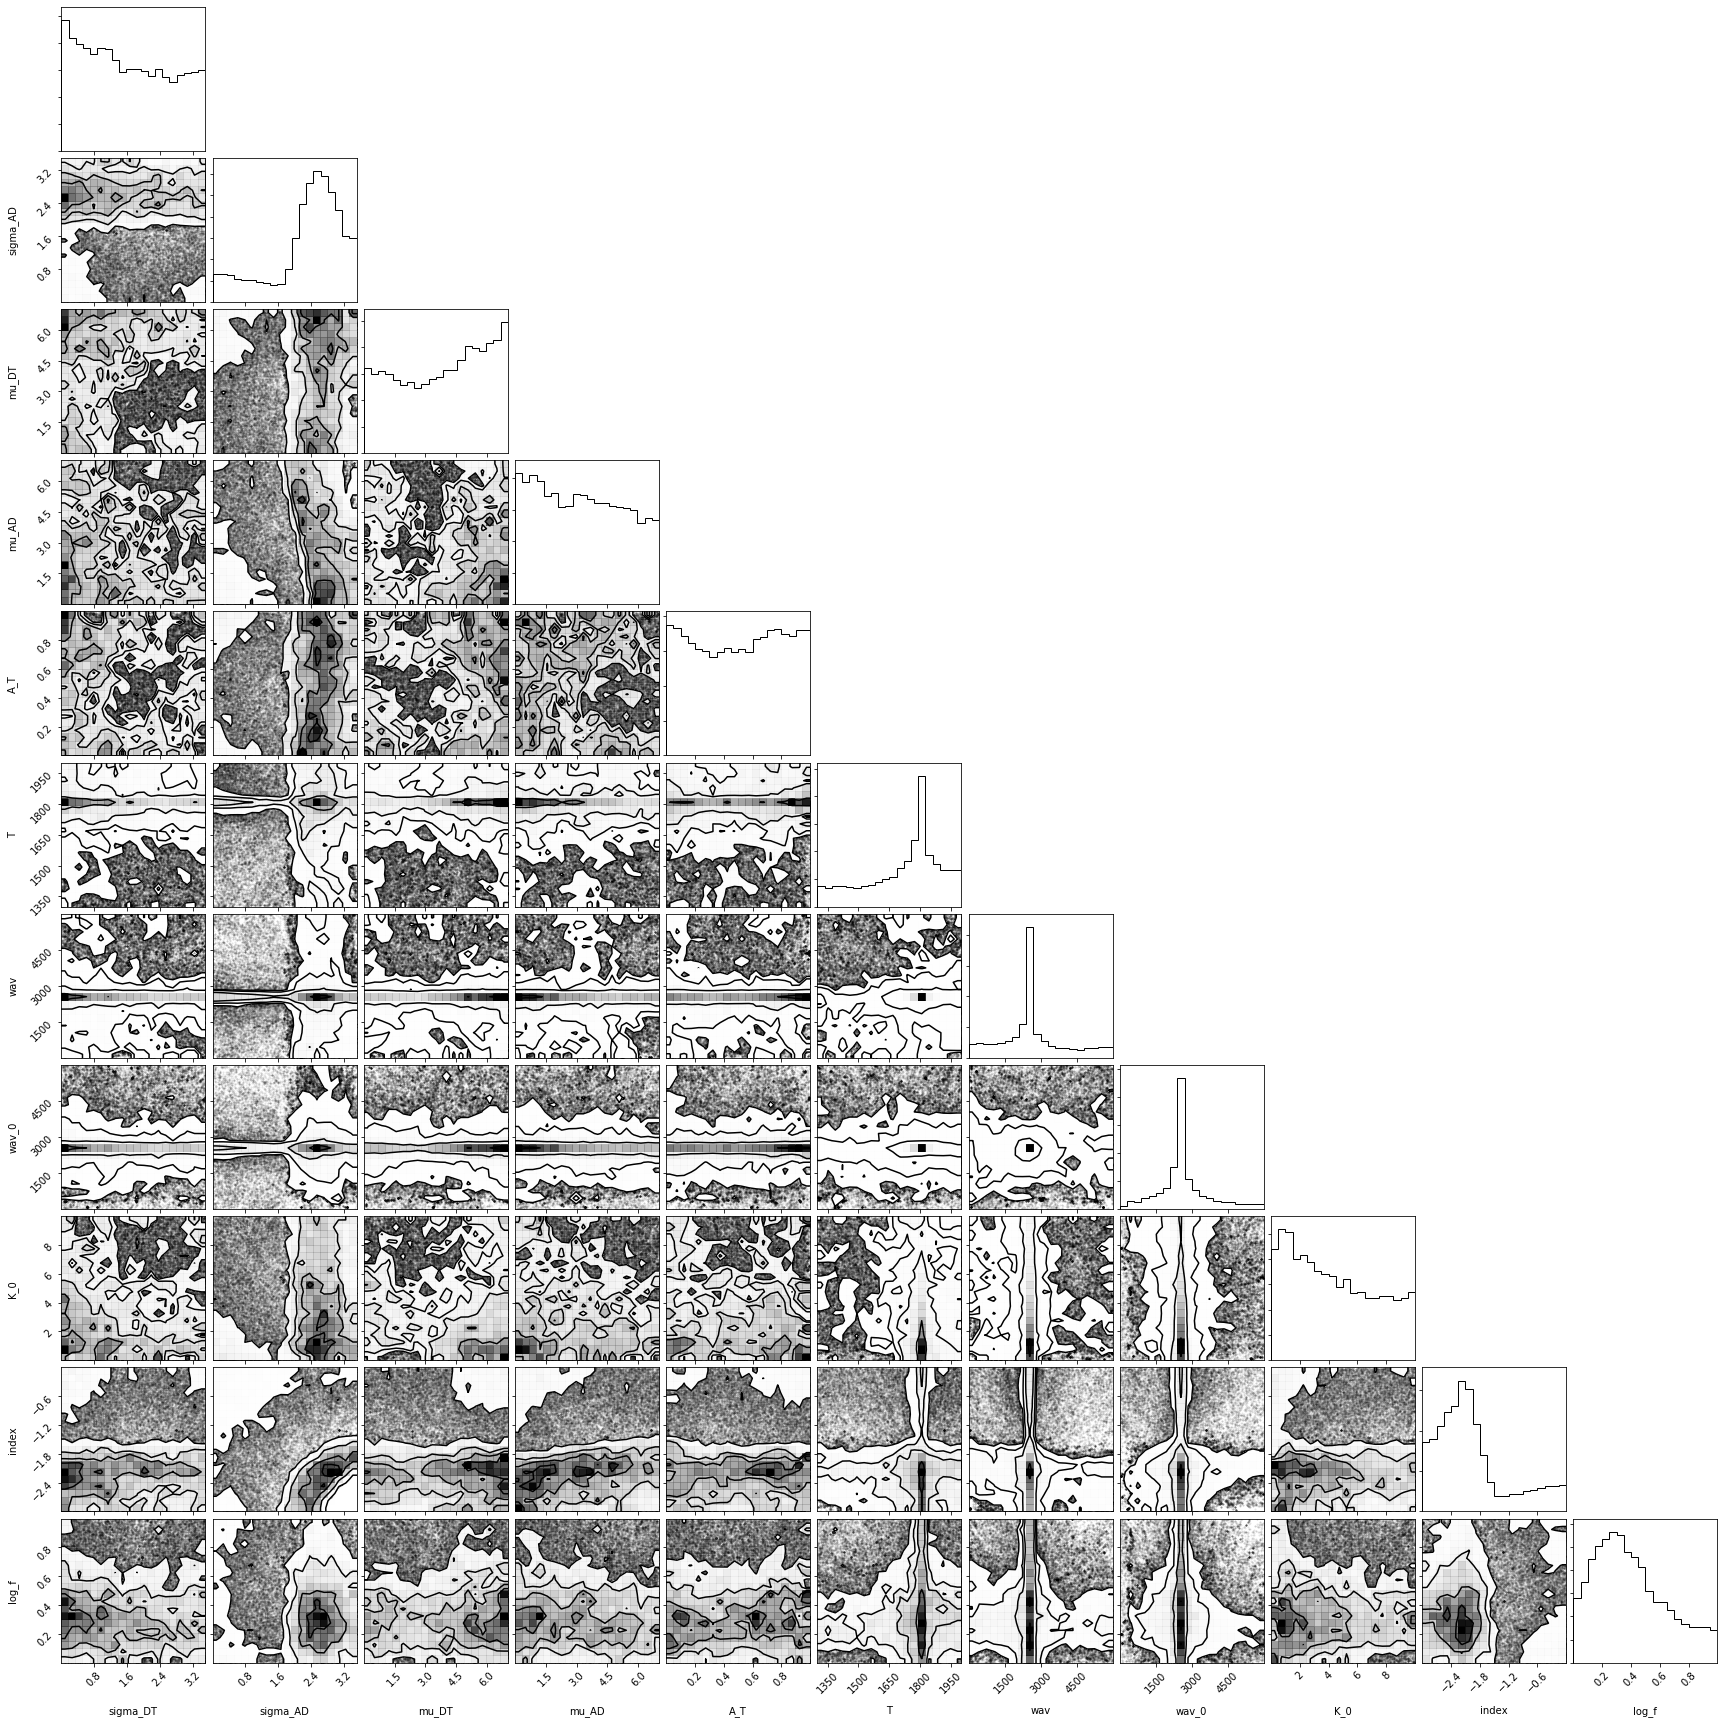

In [514]:
import corner

fig = corner.corner(
    flat_samples, labels=labels
);